In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [63]:
df = pd.read_csv("../resources/pulsar_stars.csv")
df.head()
df.shape

(17898, 9)

In [64]:
# rename column name because it s too long
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [65]:
df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [67]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [68]:
round(df.describe(), 2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


In [69]:
X = df.drop('target_class', axis=1)
y = df['target_class']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [72]:
X_train = pd.DataFrame(X_train)

In [73]:
X_train.describe()

,0,1,2,3,4,5,6,7
count,1.252800e+04,1.252800e+04,1.252800e+04,12528.000000,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04
mean,-3.317908e-17,-1.554029e-16,4.083579e-17,0.000000,-1.474626e-17,-4.083579e-17,1.746864e-16,-1.191044e-16
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-4.044077e+00,-3.181981e+00,-2.197598e+00,-0.578563,-4.230319e-01,-9.736112e-01,-2.465015e+00,-1.007002e+00
25%,-3.880831e-01,-6.131693e-01,-4.264487e-01,-0.320257,-3.653829e-01,-6.117121e-01,-5.663053e-01,-6.626888e-01
50%,1.571428e-01,5.967714e-02,-2.464899e-01,-0.258115,-3.356718e-01,-4.046293e-01,2.916540e-02,-2.087919e-01
75%,6.226035e-01,6.528819e-01,-8.369164e-03,-0.141000,-2.448071e-01,1.039735e-01,5.368958e-01,3.255132e-01
max,3.159394e+00,7.626990e+00,7.052487e+00,10.660582,7.090529e+00,4.311715e+00,5.830553e+00,1.026999e+01


In [76]:
def run():
    C = [1.0, 100.0, 1000.0]
    scoreOne = []
    scoreTwo = []
    scoreThree = []
    for c in C:
        # Linear kernel
        svc = SVC(kernel='linear', C=c)
        svc.fit(X_train, y_train)
        y_pred=svc.predict(X_test)
        #print("Linear kernel:", accuracy_score(y_test, y_pred))
        scoreOne.append(accuracy_score(y_test, y_pred))
        
        # Polynomiale kernel
        svc = SVC(kernel='poly', C=c)
        svc.fit(X_train, y_train)
        y_pred=svc.predict(X_test)
        #print("Polynomial kernel:", accuracy_score(y_test, y_pred))
        scoreTwo.append(accuracy_score(y_test, y_pred))
        
        # Sigmoid kernel
        svc = SVC(kernel='sigmoid', C=c)
        svc.fit(X_train, y_train)
        y_pred=svc.predict(X_test)
        #print("Sigmoid kernel:", accuracy_score(y_test, y_pred))
        scoreThree.append(accuracy_score(y_test, y_pred))
    
    return (scoreOne, scoreTwo, scoreThree)
        

In [77]:
run()

([0.9806331471135941, 0.9806331471135941, 0.9806331471135941],
 [0.9780260707635009, 0.9804469273743017, 0.9811918063314712],
 [0.8666666666666667, 0.8662942271880819, 0.8662942271880819])

In [82]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4898   28]
 [  76  368]]

True Positives(TP) =  4898

True Negatives(TN) =  368

False Positives(FP) =  28

False Negatives(FN) =  76


<Axes: >

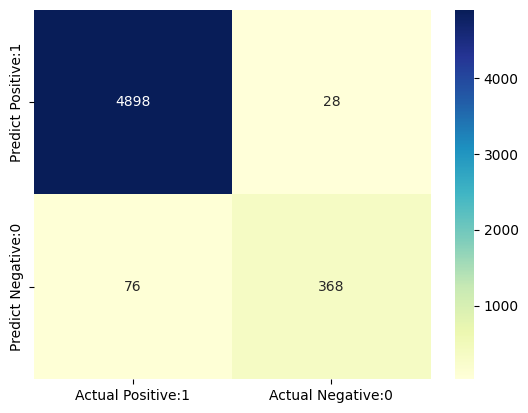

In [83]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4926
           1       0.93      0.83      0.88       444

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



In [87]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [88]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.9806
Classification error : 0.0194


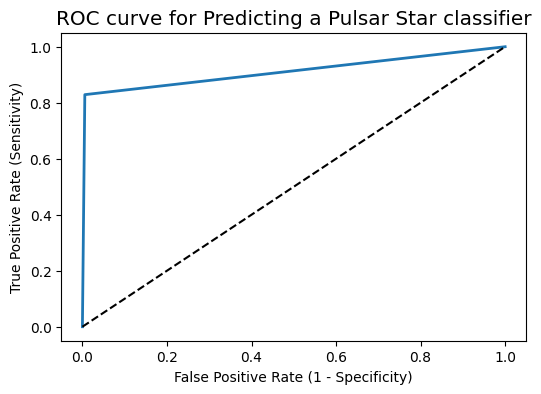

In [90]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()